In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [14]:
#righthanded derive f'(x) = lim [f(x+dx) - f(x)] / dx
#righthanded taylor expansion f(x+dx) = f(x) + dx * f'(x) + dx^2/2! * f''(x)  + ...
#   ->
#      righthanded derivative :[f(x+dx) - f(x)] / dx = f'(x) + O(dx); dx/2 * f''(e) measure of error by difference quotatient
#      :error measurement dependent on size of f'', or smoothness
#      :focus on part of error we can control so say error term is of order dx, O(dx)
#for expansion on other side...
#      lefthanded taylor expansion :f(x-dx) = f(x) - dx*f'(x) + dx^2/2! * f''(x) - dx^3/3! * f'''(x) + ...
#combine to get central diff approx: [f(x+dx) - f(x-dx)] / (2dx) = f'(x) + dx^2/3! * f'''(e)
#      :error term is O(dx^2), converges more rapidly as dx->0
#2deriv approx
#      :[f(x+dx) - 2f(x) + f(x-dx)]/dx^2 = f''(x) + 1/12*dx^2f''''(e)

#heat equation
#    :du/dt = a^2 * du^2/dx^2, 0<x<1, t>0
#    :bc u(0,t) = 0 u(X,t) = 0
#    :ic u(x,0) = f(x)

#divide spatial interbal [0,1] into N+1 parts
#divide temporal interval [0,T] into M+1 parts

#method of finite differences: replace derivatives with difference quotients
#replacing diffeq and rearranging:
#    u(x, t+dt) = u(x,t) + a^2 * (dt/dx^2) * [u(x+dx, t) - 2*u(x,t) + u(x-dx,t)]
#    

#example
#choose alpha = 1/2
#X = 2
#t = 100
#
alpha = 1/2
ic = lambda x: 2*np.sin(np.pi*x/2) - np.sin(np.pi*x) + 4*np.sin(2*np.pi*x)

M = 100
T = 10#1
dt = T/(M)

N = 100
X = 2#1
dx = X/(N)

constant = dt / dx**2

#TemporalRange = np.arange(0,T+dt, dt)
#SpatialRange = np.arange(0,X+dx, dx)

X,Y = np.mgrid[0:T+dt:dt, 0:X+dx:dx]

#3D surface plots
#fig,ax = plt.subplots(subplot_kw = {'projection':'3d'})
#surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm, linewidth = 0, )
#fig.colorbar()
#plt.show()

u = np.zeros(X.shape)

#setting IC values
for m in range(1,N):
    u[0,m] = ic(m*dx)

#setting BC values
for k in range(0,M+1):
    u[k,0] = 0
    u[k,N] = 0

for k in range(1,M): #time step, M to not reach boundaries
    for n in range(1,N): #spatial step, N to not reach boundaries
        u[k, n] = u[k-1,n] + alpha**2 * constant * (u[k-1,n+1] - 2 * u[k-1, n] + u[k-1, n-1])
        
#bc = 0 for all time
#



[[ 0.00000000e+000  5.01363933e-001  9.95007354e-001 ... -7.43845276e-001
  -3.75720897e-001  0.00000000e+000]
 [ 0.00000000e+000  1.88319570e-002  3.76790646e-002 ...  1.97991348e-001
   9.90614226e-002  0.00000000e+000]
 [ 0.00000000e+000  1.97788711e-002  3.96421670e-002 ...  1.81492105e-001
   9.08428503e-002  0.00000000e+000]
 ...
 [ 0.00000000e+000  3.52814576e+217 -6.82839132e+217 ... -2.03884307e+218
   1.13579780e+218  0.00000000e+000]
 [ 0.00000000e+000 -8.64264532e+219  1.67275976e+220 ...  4.79510472e+220
  -2.68266619e+220  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]]
(101, 101)


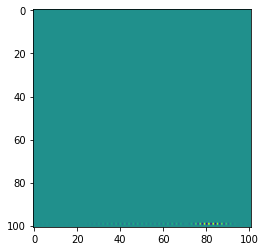

In [15]:
print(u)
print(u.shape)
plt.imshow(u)